# 분해 (Decomposition)
* 큰 하나의 행렬을 여러개의 작은 행렬로 분해
* 분해 과정에서 **중요한 정보**만 남게됨

## 데이터 불러오기 및 시각화

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA, TruncatedSVD, DictionaryLearning, FactorAnalysis, FastICA, NMF, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
iris, labels = load_iris(return_X_y = True)
faces, _ = fetch_olivetti_faces(return_X_y = True, shuffle = True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\CPB06GameN\scikit_learn_data


In [8]:
def plot_iris(iris, labels):
    plt.figure()
    colors = ['navy', 'purple', 'red']
    for xy, label in zip(iris, labels):
        plt.scatter(xy[0], xy[1], color = colors[label])

In [4]:
def show_faces(faces):
    plt.figure()
    num_rows, num_cols = 2, 3
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(np.reshape(faces[i], (64, 64)), cmap = plt.cm.gray)

In [5]:
iris.shape

(150, 4)

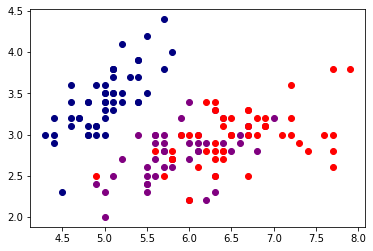

In [9]:
plot_iris(iris[:, :2], labels)

In [10]:
faces.shape

(400, 4096)

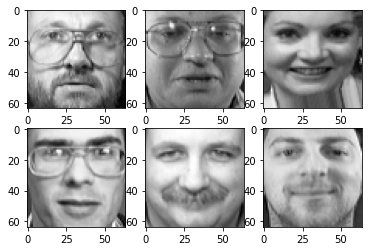

In [11]:
show_faces(faces)

## Principal Component Analysis (PCA)

* PCA를 사용해 iris 데이터 변환
* $150 \times 4$ 크기의 데이터를 $150 \times 2$ 크기의 행렬로 압축

* 분산을 최대로하는 선을 찾음 > 선(주성분 선, 보조 선)을 찾아 이를 기준으로 저차원으로 변환

In [12]:
# iris데이터의 최초성분은 '4' > '2'로 줄여보기
model = PCA(n_components = 2, random_state = 0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

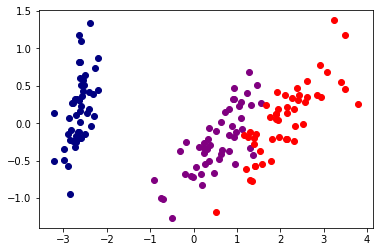

In [13]:
plot_iris(transformed_iris, labels)

## 원래 iris데이터보다 더 구분이 명확하게 되었음

* PCA를 통해 학습된 각 컴포넌트 (6개)
* 각 컴포넌트는 얼굴의 주요 특징을 나타냄

In [15]:
# (400, 4096) > (6, 4096)

model = PCA(n_components = 2*3, random_state = 0)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

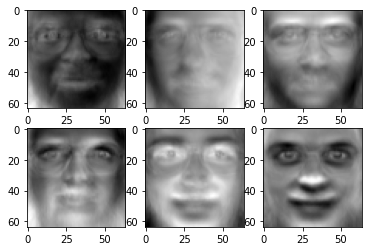

In [16]:
show_faces(faces_components)

## 원본 이미지의 '주요특징'만 남기고 축소 (눈, 코, 입, 눈매, 얼굴선 ... 등)

## Incremental PCA

* PCA는 SVD 알고리즘 실행을 위해 전체 학습용 데이터 셋을 메모리에 올려야 함
* Incremental PCA는 학습 데이터를 미니 배치 단위로 나누어 사용
* 학습 데이터가 크거나 **온라인**으로 PCA 적용이 필요할 때 유용

In [17]:
model = IncrementalPCA(n_components = 2)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

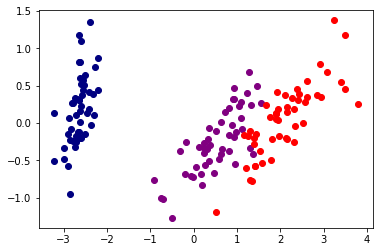

In [18]:
plot_iris(transformed_iris, labels)

In [20]:
model = IncrementalPCA(n_components = 2 * 3)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

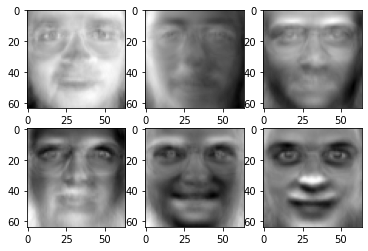

In [21]:
show_faces(faces_components)

## Kernel PCA

* 차원 축소를 위한 복잡한 ***비선형*** 투형

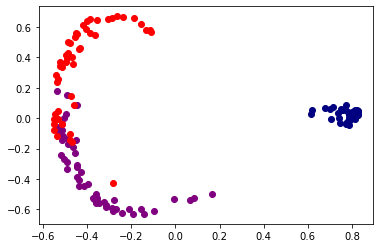

In [24]:
model = KernelPCA(n_components = 2, kernel = 'rbf', random_state = 0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

In [25]:
model = KernelPCA(n_components = 2 * 3, kernel = 'rbf', random_state = 0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## 'components_' 속성이없기때문에 못돌림

AttributeError: 'KernelPCA' object has no attribute 'components_'

## Sparse PCA

* PCA의 주요 단점 중 하나는 주성분들이 보통 모든 입력 변수들의 **선형결합**으로 나타난다는 점
* 희소 주성분분석(Sparse PCA)는 몇 개 변수들만의 선형결합으로 주성분을 나타냄으로써 이러한 단점을 극복

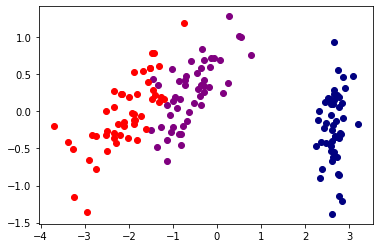

In [26]:
model = SparsePCA(n_components = 2, random_state = 0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

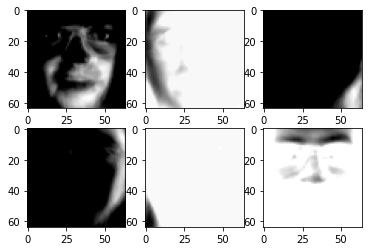

In [27]:
model = SparsePCA(n_components = 2 * 3, random_state = 0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Truncated Singular Value Decomposition (Truncated SVD)

* PCA는 정방행렬에 대해서만 행렬 분해 가능
* SVD는 정방행렬 뿐만 아니라 행과 열이 다른 행렬도 분해 가능
* PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하지만, SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능
* 전체 행렬 크기에 대해 Full SVD를 사용하는 경우는 적음
* 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD를 주로 사용

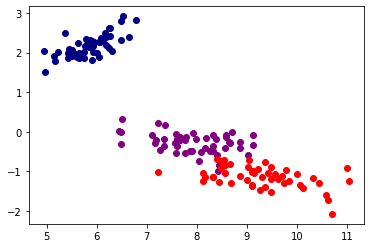

In [30]:
model = TruncatedSVD(n_components = 2, random_state = 0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

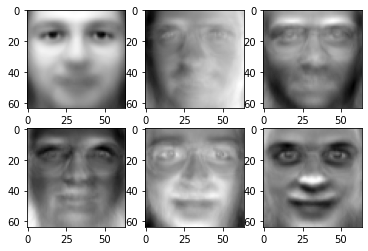

In [29]:
model = TruncatedSVD(n_components = 2 * 3, random_state = 0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Dictionary Learning

* Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전 찾기
* Sparse coding은 overcomplete 기저벡터(basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발
* 기저 벡터는 벡터 공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선형 조합으로 나타남
- Dictionary Learning > 기저벡터를 가장 잘 찾아내는 형태

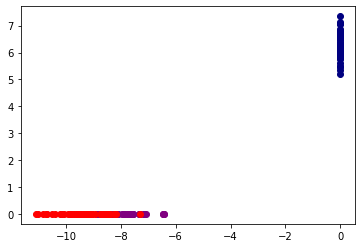

In [32]:
model = DictionaryLearning(n_components = 2, random_state = 0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

## 정확히 필요한 부분만 남은 형태

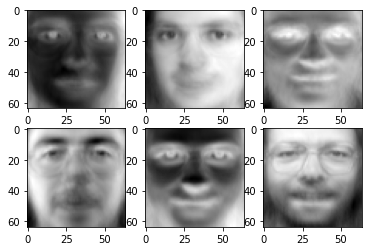

In [33]:
model = DictionaryLearning(n_components = 2 * 3, random_state = 0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Factor Analysis

* 요인 분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법
* 요인 분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법
* PCA에서는 오차(error)를 고려하지 않고, 요인 분석에서는 **오차(error)를 고려**

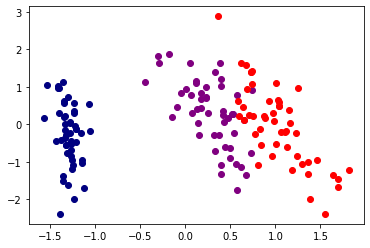

In [34]:
model = FactorAnalysis(n_components = 2, random_state = 0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

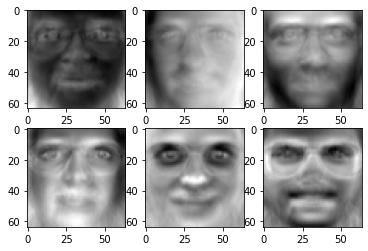

In [35]:
model = FactorAnalysis(n_components = 2 * 3, random_state = 0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Independent Component Analysis(ICA)

* 독립 성분 분석(Independent Component Analysis, ICA)은 다변량의 신호를 통계적으로 독립적인 하부 성분으로 분리하는 계산 방법
* ICA는 주성분을 이용하는 점은 PCA와 유사하지만, 데이터를 가장 잘 설명하는 축을 찾는 PCA와 달리 가장 독립적인 축, **독립성이 최대가 되는 벡터를 찾음**

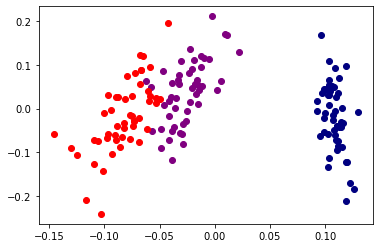

In [36]:
model = FastICA(n_components = 2, random_state = 0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

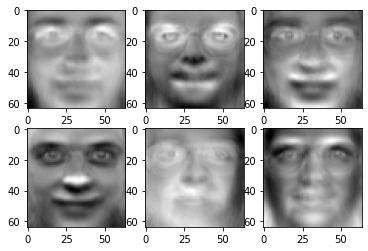

In [37]:
model = FastICA(n_components = 2 * 3, random_state = 0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Non-negative Matrix Factorization

* 음수 미포함 행렬 분해(Non-negative matrix factorization, NMF)는 음수를 포함하지 않은 행렬 V를 음수를 포함하지 않은 행렬 W와 H의 곱으로 분해하는 알고리즘

C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


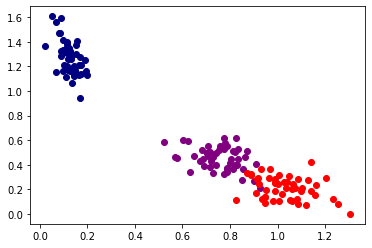

In [47]:
model = NMF(n_components = 2, random_state = 0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


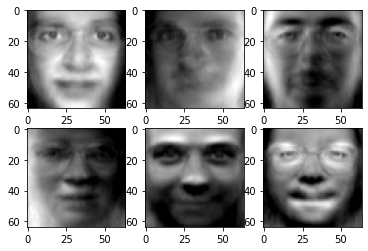

In [48]:
model = NMF(n_components = 2 * 3, random_state = 0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Latent Dirichlet Allocation (LDA)

* 잠재 디리클레 할당은 이산 자료들에 대한 **확률적** 생성 모형
* 디리클레 분포에 따라 잠재적인 의미 구조를 파악


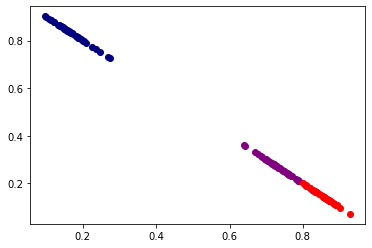

In [51]:
model = LatentDirichletAllocation(n_components = 2, random_state = 0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

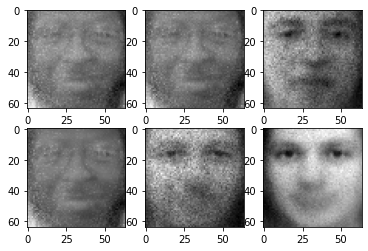

In [52]:
model = LatentDirichletAllocation(n_components = 2 * 3, random_state = 0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Linear Discriminant Analysis (LDA)

* LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소
* LDA는 지도학습 분류에서 사용하기 쉽도록 개별 **클래스**를 분별할 수 있는 기준을 최대한 유지하면서 차원 축소
* 즉, 클래스를 주는 방식이기때문에 지도학습만 가능하다 !!

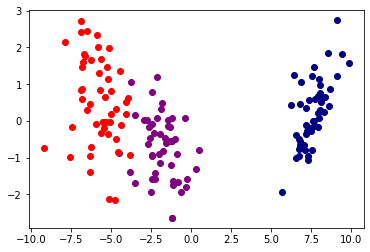

In [53]:
model = LinearDiscriminantAnalysis(n_components = 2)
model.fit(iris, labels)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

## 압축된 표현을 사용한 학습
* 행렬 분해를 통해 압축된 데이터를 사용해 학습
* ***손실(loss)***을 각 알고리즘마다 알아보자

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [55]:
def min_max_scale(x):
    min_value, max_value = np.min(x, 0), np.max(x, 0)
    x = (x - min_value) / (max_value - min_value)
    return x

In [64]:
def plot_digits(digits, labels):
    digits = min_max_scale(digits)
    ax = plt.subplot(111, projection = '3d')
    for i in range(digits.shape[0]):
        ax.text(digits[i, 0], digits[i, 1], digits[i, 2], str(labels[i]), color = plt.cm.Set1(labels[i] / 10.),
               fontdict = {'weight': 'bold', 'size' : 9})
    ax.view_init(4, -72)

In [58]:
digits = load_digits()

In [59]:
nmf = NMF(n_components = 3)
nmf.fit(digits.data)
decomposed_digits = nmf.transform(digits.data)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [62]:
print(decomposed_digits.shape)
print(digits.data.shape)

## 64차원 > 3차원으로 줄임 : 행렬분해(NMF)

(1797, 3)
(1797, 64)


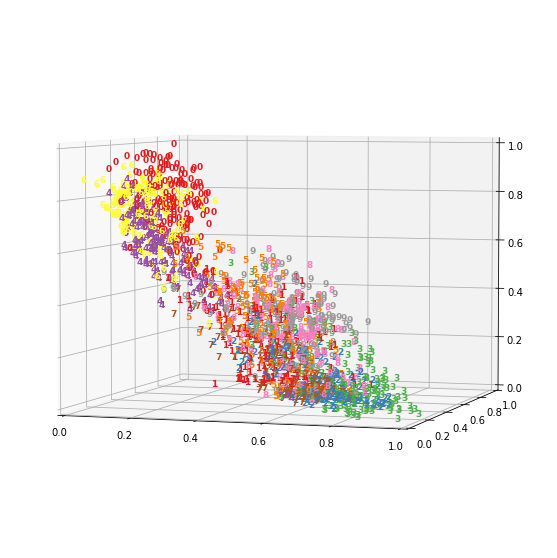

In [65]:
plt.figure(figsize=(20, 10))
plot_digits(decomposed_digits, digits.target)

## 좋게 분해된 결과는 아닌듯함 > 이런 결과를 가지고 기존의 알고리즘이 어떻게 동작하는지 알아보자

### KNN

In [66]:
knn = KNeighborsClassifier()

In [67]:
score = cross_val_score(estimator = knn, X = digits.data, y = digits.target, cv = 5)
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [68]:
print('mean cross val score: {} (+/- {})'.format(score.mean() ,score.std()))

mean cross val score: 0.9627282575054161 (+/- 0.011168537355954218)


In [70]:
score = cross_val_score(estimator = knn, X = decomposed_digits, y = digits.target, cv = 5)
score

## 성능 감소...

array([0.54722222, 0.58055556, 0.64066852, 0.59610028, 0.56267409])

### SVM

In [71]:
svm = SVC()

In [72]:
score = cross_val_score(estimator = svm, X = digits.data, y = digits.target, cv = 5)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [73]:
print('mean cross val score: {} (+/- {})'.format(score.mean() ,score.std()))

mean cross val score: 0.9632838130609718 (+/- 0.02008605863225686)


In [74]:
score = cross_val_score(estimator = svm, X = decomposed_digits, y = digits.target, cv = 5)
score

array([0.61388889, 0.62222222, 0.66016713, 0.60167131, 0.59888579])

In [75]:
print('mean cross val score: {} (+/- {})'.format(score.mean() ,score.std()))

mean cross val score: 0.6193670690188796 (+/- 0.022070024720937543)


### Decision Tree

In [77]:
dt = DecisionTreeClassifier()

In [78]:
score = cross_val_score(estimator = dt, X = digits.data, y = digits.target, cv = 5)
score

array([0.76388889, 0.70833333, 0.7994429 , 0.84679666, 0.80501393])

In [79]:
print('mean cross val score: {} (+/- {})'.format(score.mean() ,score.std()))

mean cross val score: 0.7846951408232745 (+/- 0.046370191992312286)


In [82]:
score = cross_val_score(estimator = dt, X = decomposed_digits, y = digits.target, cv = 5)
score

array([0.57222222, 0.51666667, 0.57938719, 0.57938719, 0.49582173])

In [83]:
print('mean cross val score: {} (+/- {})'.format(score.mean() ,score.std()))

mean cross val score: 0.5486969978334881 (+/- 0.035380638596617296)


### Random Forest

In [84]:
rf = RandomForestClassifier()

In [85]:
score = cross_val_score(estimator = rf, X = digits.data, y = digits.target, cv = 5)
score

array([0.93055556, 0.91666667, 0.96100279, 0.9637883 , 0.93593315])

In [86]:
print('mean cross val score: {} (+/- {})'.format(score.mean() ,score.std()))

mean cross val score: 0.9415892912411019 (+/- 0.01813588865368419)


In [87]:
score = cross_val_score(estimator = rf, X = decomposed_digits, y = digits.target, cv = 5)
score

array([0.56944444, 0.60833333, 0.66016713, 0.59331476, 0.55431755])

In [88]:
print('mean cross val score: {} (+/- {})'.format(score.mean() ,score.std()))

mean cross val score: 0.5971154441349428 (+/- 0.036641903589448445)


## 복원된 표현을 사용한 학습
* 분해 후 복원된 행렬을 사용해 학습

In [90]:
components = nmf.components_

# '@' : 행렬곱 연산자
reconstructed_digits = decomposed_digits @ components
reconstructed_digits.shape

(1797, 64)

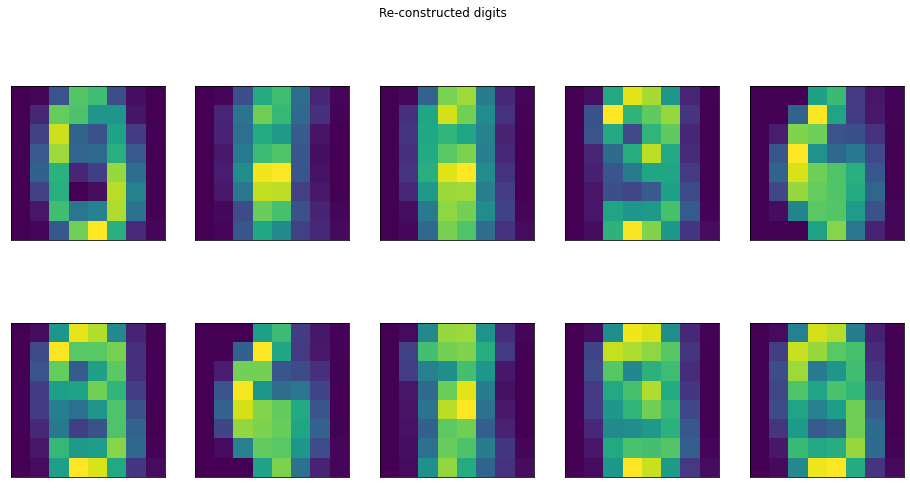

In [91]:
plt.figure(figsize = (16, 8))
plt.suptitle('Re-constructed digits')
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reconstructed_digits[i].reshape(8, 8))

### KNN

In [92]:
score = cross_val_score(estimator = knn, X = reconstructed_digits, y = digits.target, cv = 5)
score

array([0.54166667, 0.59444444, 0.66295265, 0.57660167, 0.57381616])

In [93]:
print('mean cross val score: {} (+/- {})'.format(score.mean() ,score.std()))

mean cross val score: 0.5898963169297431 (+/- 0.04029722337499952)


### SVM

In [94]:
score = cross_val_score(estimator = svm, X = reconstructed_digits, y = digits.target, cv = 5)
score

array([0.62777778, 0.60555556, 0.66016713, 0.61002786, 0.5821727 ])

In [95]:
print('mean cross val score: {} (+/- {})'.format(score.mean() ,score.std()))

mean cross val score: 0.6171402042711235 (+/- 0.025969174809053776)


### Decision Tree

In [96]:
score = cross_val_score(estimator = dt, X = reconstructed_digits, y = digits.target, cv = 5)
score

array([0.57777778, 0.53055556, 0.57660167, 0.545961  , 0.55431755])

In [97]:
print('mean cross val score: {} (+/- {})'.format(score.mean() ,score.std()))

mean cross val score: 0.5570427112349118 (+/- 0.018134475964043727)


### Random Forest

In [98]:
score = cross_val_score(estimator = rf, X = reconstructed_digits, y = digits.target, cv = 5)
score

array([0.58333333, 0.58333333, 0.64345404, 0.58774373, 0.56824513])

In [99]:
print('mean cross val score: {} (+/- {})'.format(score.mean() ,score.std()))

mean cross val score: 0.59322191272052 (+/- 0.02597184968326442)


## 이미지 복원

In [102]:
from sklearn.model_selection import train_test_split

In [112]:
train_faces, test_faces = train_test_split(faces, test_size = .1)

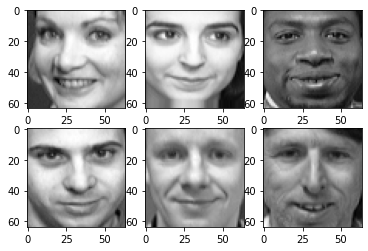

In [113]:
show_faces(train_faces)

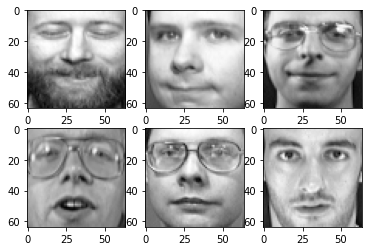

In [114]:
show_faces(test_faces)

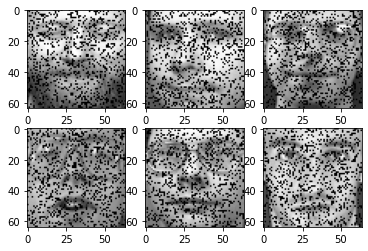

In [115]:
damaged_faces = []
for face in test_faces:
    idx = np.random.choice(range(64 * 64), size = 1024)
    damaged_face = face.copy()
    damaged_face[idx] = 0.
    damaged_faces.append(damaged_face)
show_faces(damaged_faces)

In [122]:
nmf = NMF(n_components = 10)
nmf.fit(train_faces)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=10)

In [123]:
metrix1 = nmf.transform(damaged_faces)
matrix2 = nmf.components_
show_faces(metrix1 @ matrix2)

TypeError: H should have the same dtype as X. Got H.dtype = float32.